In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../data/gastos_2003_2022.csv", dtype=str, encoding='cp850', delimiter=';')
#df = pd.read_csv("gastos_2003_2022.csv", dtype=str, encoding='cp850', delimiter=';')
df.head()

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC
0,02/01/2003,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
1,02/01/2003,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
2,02/01/2003,***.868.251-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N
3,03/01/2003,***.004.131-**,00592717000170,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N
4,03/01/2003,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N


In [9]:
#Verificar o total de linhas e colunas
df.shape

(113342, 8)

In [10]:
#Veriricar informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113342 entries, 0 to 113341
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATA PGTO               113342 non-null  object
 1   CPF SERVIDOR            113340 non-null  object
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object
 3   NOME FORNECEDOR         113340 non-null  object
 4   VALOR                   113340 non-null  object
 5   TIPO                    113340 non-null  object
 6   SUBELEMENTO DE DESPESA  113340 non-null  object
 7   CDIC                    113340 non-null  object
dtypes: object(8)
memory usage: 6.9+ MB


In [11]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                2
CPF/CNPJ FORNECEDOR       436
NOME FORNECEDOR             2
VALOR                       2
TIPO                        2
SUBELEMENTO DE DESPESA      2
CDIC                        2
dtype: int64

In [12]:
#Verificar o percentual dos dados nulos
(df.isnull().sum() / len(df)) * 100

DATA PGTO                 0.000000
CPF SERVIDOR              0.001765
CPF/CNPJ FORNECEDOR       0.384676
NOME FORNECEDOR           0.001765
VALOR                     0.001765
TIPO                      0.001765
SUBELEMENTO DE DESPESA    0.001765
CDIC                      0.001765
dtype: float64

In [13]:
#Remoção de dados com valores negativos
df = df.dropna(subset=["VALOR"])

In [14]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                0
CPF/CNPJ FORNECEDOR       434
NOME FORNECEDOR             0
VALOR                       0
TIPO                        0
SUBELEMENTO DE DESPESA      0
CDIC                        0
dtype: int64

In [15]:
# Convertendo a coluna 'DATA PGTO' para datetime
df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Criar colunas separadas para o dia, mês e ano
df['DIA PGTO'] = df['DATA PGTO'].dt.day
df['MES PGTO'] = df['DATA PGTO'].dt.month
df['ANO PGTO'] = df['DATA PGTO'].dt.year

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113340 non-null  object        
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 9.1+ MB
None


,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
0,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
1,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
2,2003-01-02,***.868.251-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
3,2003-01-03,***.004.131-**,00592717000170,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
4,2003-01-03,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
113335,2022-12-03,***.136.591-**,17261661005728,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,"179,5",C,FORNECIMENTO DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113336,2022-12-03,***.136.591-**,39879944000116,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,"54,95",C,GENEROS DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113337,2022-12-04,***.136.591-**,47508411094975,COMPANHIA BRASILEIRA DE DISTRIBUIÇÃO,"518,07",C,GENEROS DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022
113338,2022-12-04,***.136.591-**,12550441000146,RESTAURANTE SOHO,"330,52",C,FORNECIMENTO DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022


In [16]:
#Converter os valores para posterior realização de cálculos

# Remover 'R$', substituir ponto (milhar) por vazio e a vírgula por ponto (decimal)
df['VALOR'] = df['VALOR'].str.replace('R$', '')   # Remove 'R$'
df['VALOR'] = df['VALOR'].str.replace('.', '')    # Remove o separador de milhar
df['VALOR'] = df['VALOR'].str.replace(',', '.')   # Substitui a vírgula decimal por ponto

# Converter para tipo numérico (float)
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce')

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB
None


,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
0,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,1696.90,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
1,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,1336.60,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
2,2003-01-02,***.868.251-**,31349202000177,JW TRANSPORTADORA TURÍSTICA,1396.43,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
3,2003-01-03,***.004.131-**,00592717000170,FLORES ALVORADA,8585.00,C,OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
4,2003-01-03,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...,251.50,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
113335,2022-12-03,***.136.591-**,17261661005728,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,179.50,C,FORNECIMENTO DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113336,2022-12-03,***.136.591-**,39879944000116,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,54.95,C,GENEROS DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113337,2022-12-04,***.136.591-**,47508411094975,COMPANHIA BRASILEIRA DE DISTRIBUIÇÃO,518.07,C,GENEROS DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022
113338,2022-12-04,***.136.591-**,12550441000146,RESTAURANTE SOHO,330.52,C,FORNECIMENTO DE ALIMENTAÇÃO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB


In [18]:
df.sample(5)

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
81349,2014-07-21,***.455.101-**,33000118000500,TELEMAR NORTE LESTE SA,117.03,D,SERVIÇOS DE TELECOMUNICAÇÕES,00150.000883/2014-48.R.08.25/06/2014.31/12/2018.N,21,7,2014
56857,2010-03-02,***.570.341-**,08998246000106,BOURBON IBIRAPUERA HOTEL & CONVENTION,180.60,C,HOSPEDAGENS,00150.000391/2010-29.R.08.27/02/2010.31/12/2014.N,2,3,2010
90181,2016-04-24,***.084.625-**,02451848000162,AUTO BAN - CONCESSIONÁRIA DO SISTEMA ANHANGÜER...,5.30,D,PEDAGIOS,00185.000882/2016-68.R.05.\n14/04/2016.31/12/2...,24,4,2016
24744,2006-08-15,***.787.941-**,22676555000190,NOBRE PALACE HOTEL LTDA,264.00,C,HOSPEDAGENS,00200.003041/2006-03.R.08.30/07/2006.31/12/2014.N,15,8,2006
69032,2011-08-31,***.569.640-**,05831280000101,E BOX ESTACIONAMENTO LTDA,15.00,D,SERVIÇOS DE ESTACIONAMENTO DE VEÍCULOS,00150.001383/2011-81.R.08.28/08/2011.31/12/2014.N,31,8,2011


In [19]:
#Qual período (menor e maior ano) temos ?

print(df["ANO PGTO"].min())
print(df["ANO PGTO"].max())

2003
2022


In [20]:
#Dados estatísticos sobre o valor

df["VALOR"].describe()

count    113324.00000
mean       1013.85141
std        3970.31008
min           0.00000
25%         111.00000
50%         288.33000
75%         691.61000
max      312903.36000
Name: VALOR, dtype: float64

In [21]:
df.VALOR.sort_values(ascending=False)

106518    312903.36
46373     290176.00
110853    217711.45
110287    202936.70
106253    180154.20
            ...    
70149           NaN
70274           NaN
70275           NaN
70276           NaN
75467           NaN
Name: VALOR, Length: 113340, dtype: float64

In [22]:
#Despesa com valor igual a 0 ?
df[df["VALOR"] == 0]

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
103394,2020-02-07,***.357.911-**,34121249000258,S. MARIA DE FREITAS EIRELI,0.0,D,"SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL",00150.000043/2020-23.R.08.27/01/2020.31/12/2022.N,7,2,2020


In [23]:
df.VALOR.sum()

np.float64(114893697.21)

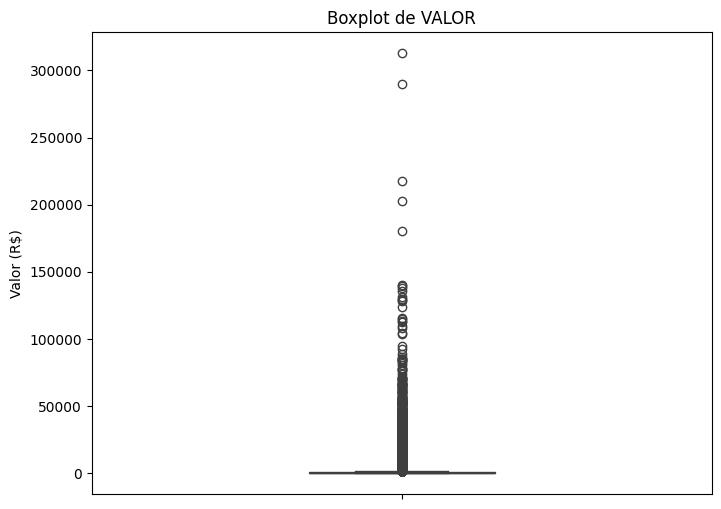

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Criar a figura para o gráfico de boxplot
plt.figure(figsize=(8, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y=df['VALOR'], width=0.3)

# Adicionar título e rótulos
plt.title('Boxplot de VALOR')
plt.ylabel('Valor (R$)')

# Mostrar o gráfico
plt.show()


In [26]:
quartis = df['VALOR'].quantile([0.25, 0.5, 0.75])

In [27]:
df['VALOR'].mean()

np.float64(1013.8514102043697)

In [28]:
quartis.mean()

np.float64(363.6466666666667)

In [29]:
df.describe()

,DATA PGTO,VALOR,DIA PGTO,MES PGTO,ANO PGTO
count,113340,113324.00000,113340.000000,113340.000000,113340.000000
mean,2011-04-06 20:53:04.923239680,1013.85141,16.032636,6.663305,2010.751006
min,2003-01-02 00:00:00,0.00000,1.000000,1.000000,2003.000000
25%,2006-11-29 00:00:00,111.00000,9.000000,4.000000,2006.000000
50%,2010-02-19 00:00:00,288.33000,16.000000,7.000000,2010.000000
75%,2015-02-27 00:00:00,691.61000,23.000000,10.000000,2015.000000
max,2022-12-19 00:00:00,312903.36000,31.000000,12.000000,2022.000000
std,NaN,3970.31008,8.624386,3.392988,5.310326


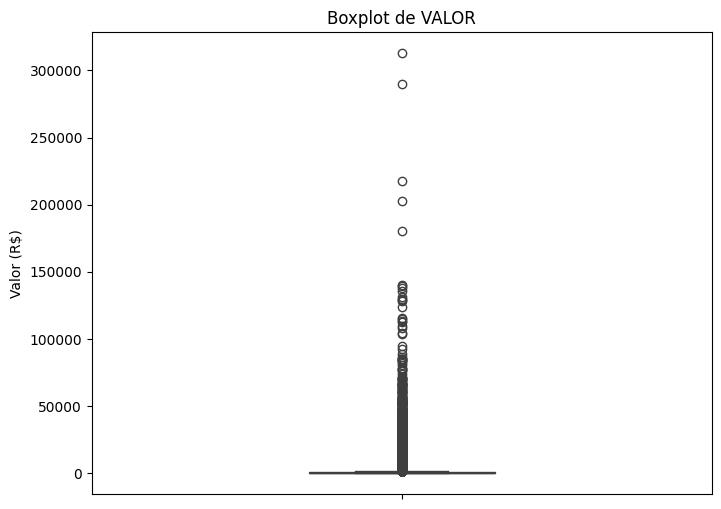

In [30]:
#Visualização gráfica do boxplot

import seaborn as sns

# Criar a figura para o gráfico de boxplot
plt.figure(figsize=(8, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y=df['VALOR'], width=0.3)

# Adicionar título e rótulos
plt.title('Boxplot de VALOR')
plt.ylabel('Valor (R$)')

# Mostrar o gráfico
plt.show()


In [31]:
#Despesas com valores muito altos ?
df[df["VALOR"] > 150000].sort_values(by="VALOR", ascending=False)

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
106518,2021-01-03,***.784.930-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,312903.36,C,HOSPEDAGENS,00150.000815/2020-27.R.08.30/01/2021.31/12/2022.N,3,1,2021
46373,2008-12-17,***.868.251-**,00866577000857,SAUIPE S.A - SAUIPE PARK,290176.00,C,HOSPEDAGENS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,17,12,2008
110853,2022-03-02,***.955.038-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,217711.45,C,HOSPEDAGENS,00150.000109/2022-47.R.08.18/02/2022.31/12/2022.N,2,3,2022
110287,2021-12-23,***.455.101-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,202936.70,C,HOSPEDAGENS,00150.000759/2021-10.R.08.24/11/2021.31/12/2022.N,23,12,2021
106253,2020-12-28,***.357.911-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,180154.20,C,HOSPEDAGENS,00150.000812/2020-93.R.08.27/12/2020.31/12/2022.N,28,12,2020


In [32]:
#1 - Total de Despesas
#1.1 - Despesas por ano

# Agrupar por 'ANO PGTO' e somar os valores
despesas_por_ano = df.groupby('ANO PGTO')['VALOR'].sum().reset_index()

# Exibir o resultado
print(despesas_por_ano)

    ANO PGTO       VALOR
0       2003  5327599.63
1       2004  6541238.37
2       2005  5204035.80
3       2006  4977941.73
4       2007  3857905.40
5       2008  6084616.50
6       2009  5438905.30
7       2010  6557394.19
8       2011  4587842.43
9       2012  4598570.59
10      2013  6022006.62
11      2014  9305096.62
12      2015  5706943.28
13      2016  4192262.08
14      2017  4003637.84
15      2018  4866043.60
16      2019  5382478.10
17      2020  7314318.09
18      2021  9927562.29
19      2022  4997298.75


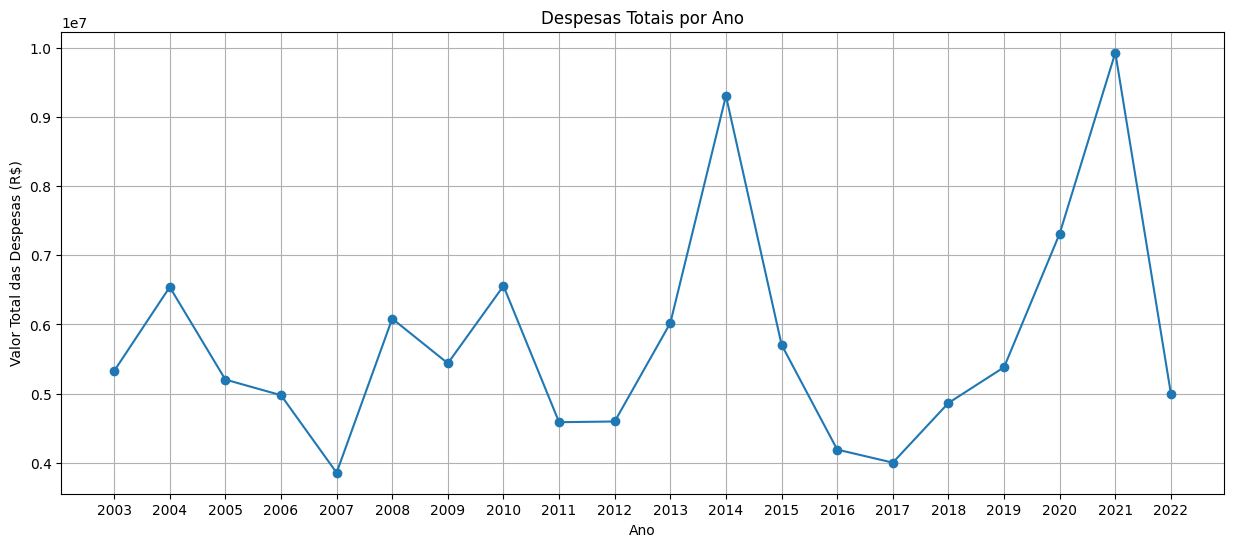

In [33]:
#1 - Total de Despesas
#1.1 - Despesas por ano

# Criar o gráfico de linhas
plt.figure(figsize=(15, 6))
plt.plot(despesas_por_ano['ANO PGTO'], despesas_por_ano['VALOR'], marker='o')

# Adicionar título e rótulos
plt.title('Despesas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total das Despesas (R$)')
plt.grid()
plt.xticks(despesas_por_ano['ANO PGTO'])  # Para mostrar todos os anos no eixo x

# Mostrar o gráfico
plt.show()

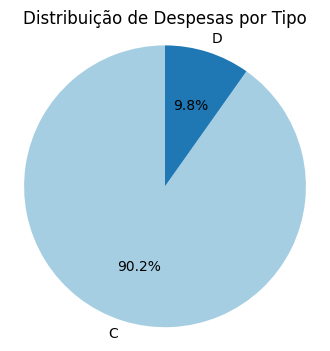

In [34]:
#1 - Total de Despesas
#1.2 - Despesas por tipo

# Agrupar por 'TIPO' e somar os valores
despesas_por_tipo = df.groupby('TIPO')['VALOR'].sum().reset_index()

# Exibir o resultado
#print(despesas_por_tipo)

# Criar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(despesas_por_tipo["VALOR"], labels=despesas_por_tipo["TIPO"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Despesas por Tipo')

# Garantir que o gráfico de pizza seja desenhado como um círculo
plt.axis('equal')

# Mostrar o gráfico
plt.show()

In [35]:
#1 - Total de Despesas
#1.3 - Despesas por subelemento

# Agrupar por 'SUBELEMENTO DE DESPESA' e somar os valores
despesas_por_subelemento = df.groupby('SUBELEMENTO DE DESPESA')['VALOR'].sum().reset_index()

# Ordenar os resultados do maior para o menor (opcional)
despesas_por_subelemento = despesas_por_subelemento.sort_values(by='VALOR', ascending=False)

# Exibir o resultado
print(despesas_por_subelemento)

                         SUBELEMENTO DE DESPESA        VALOR
32                                  HOSPEDAGENS  55397350.65
31                       GENEROS DE ALIMENTAÇÃO  17150004.28
28                  FORNECIMENTO DE ALIMENTAÇÃO  14753514.55
35               LOCACAO DE MEIOS DE TRANSPORTE  11257546.49
87   SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL   8189687.60
..                                          ...          ...
5                AQUISIÇÃO DE SOFTWARES DE BASE        35.60
99                    SERVIÇOS DE ÁGUA E ESGOTO        27.25
52                           MATERIAL BIOLÓGICO        12.70
80                OUTRAS DESPESAS COM LOCOMOÇÃO        10.80
102                        SERVIÇOS JUDICIÁRIOS         2.65

[112 rows x 2 columns]


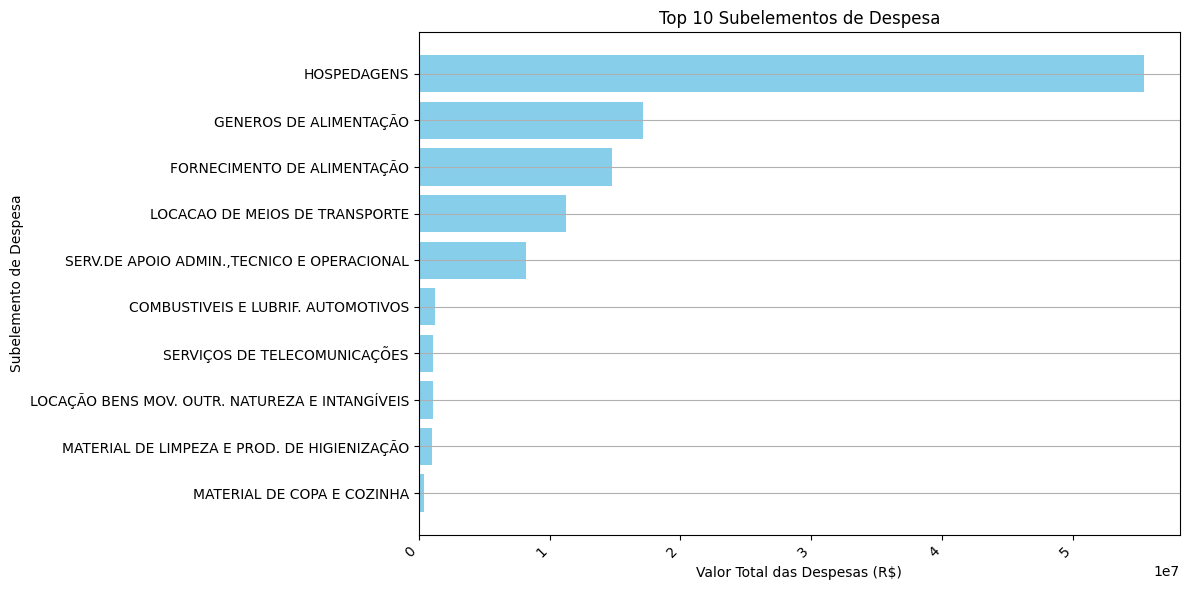

In [36]:
#1 - Total de Despesas
#1.3 - Despesas por subelemento

#TOP 10 Subelementos

# Ordenar por valor total e pegar os top 10 subelementos
top_10_subelementos = despesas_por_subelemento.sort_values(by='VALOR', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
plt.barh(top_10_subelementos['SUBELEMENTO DE DESPESA'][::-1], top_10_subelementos['VALOR'][::-1], color='skyblue')



# Adicionar título e rótulos
plt.title('Top 10 Subelementos de Despesa')
plt.ylabel('Subelemento de Despesa')
plt.xlabel('Valor Total das Despesas (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

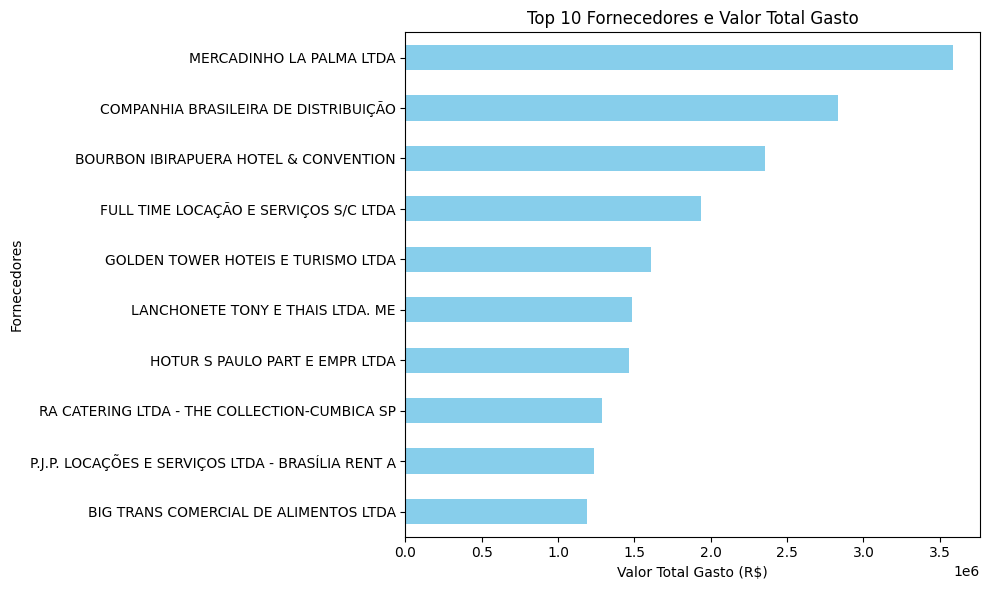

In [37]:
#1 - Total de Despesas
#1.4 - Despesas por fornecedor

# Agrupar os dados pelo nome do fornecedor e somar os valores gastos
gastos_por_fornecedor = df.groupby('NOME FORNECEDOR')['VALOR'].sum().sort_values(ascending=False)

# Selecionar os 10 principais fornecedores
top_10_fornecedores = gastos_por_fornecedor.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_fornecedores.plot(kind='barh', color='skyblue')

# Adicionar título e rótulos
plt.title('Top 10 Fornecedores e Valor Total Gasto')
plt.xlabel('Valor Total Gasto (R$)')
plt.ylabel('Fornecedores')

# Inverter a ordem das barras para ter o maior valor no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

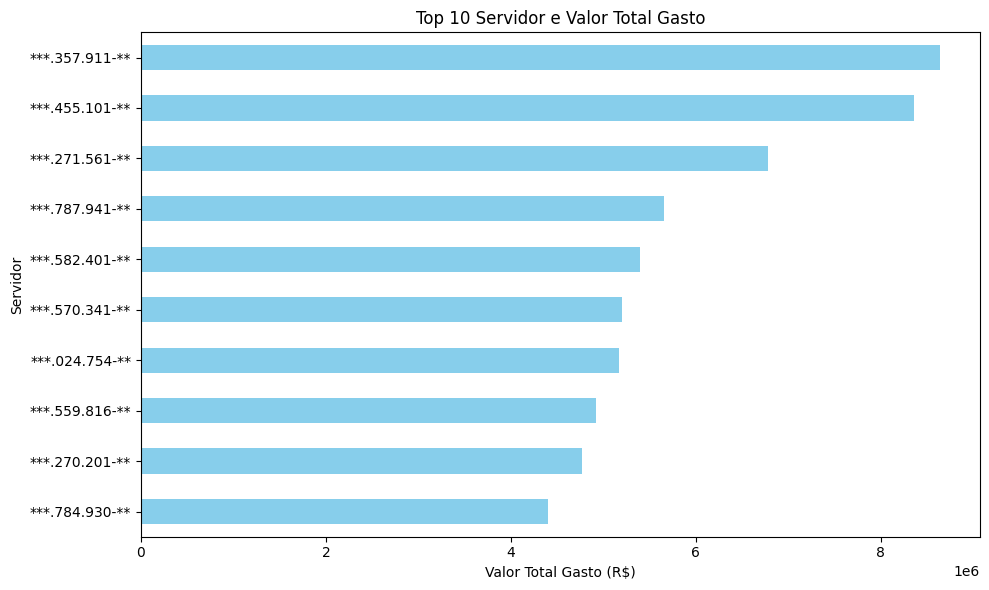

In [38]:
#1 - Total de Despesas
#1.5 - Despesas por servidor

# Agrupar os dados pelo nome do servidor e somar os valores gastos
gastos_por_servidor = df.groupby('CPF SERVIDOR')['VALOR'].sum().sort_values(ascending=False)

# Selecionar os 10 principais servidores
top_10_servidor = gastos_por_servidor.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_servidor.plot(kind='barh', color='skyblue')

# Adicionar título e rótulos
plt.title('Top 10 Servidor e Valor Total Gasto')
plt.xlabel('Valor Total Gasto (R$)')
plt.ylabel('Servidor')

# Inverter a ordem das barras para ter o maior valor no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [39]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?

# Agrupar os dados pelo CPF do servidor e contar o número de transações/gastos
transacoes_por_servidor = df.groupby('CPF SERVIDOR').agg(
    num_transacoes=('VALOR', 'count'),
    valor_total=('VALOR', 'sum')
)

# Encontrar o servidor com o maior número de transações
servidor_mais_transacoes = transacoes_por_servidor.sort_values(by='num_transacoes', ascending=False).head(1)

# Exibir o resultado
print(servidor_mais_transacoes)

                num_transacoes  valor_total
CPF SERVIDOR                               
***.787.941-**            6778   5651298.24


In [40]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
#Quanto ele gastou por ano ?
df[df['CPF SERVIDOR'] == "***.787.941-**"].groupby(["ANO PGTO"])['VALOR'].sum()

ANO PGTO
2003    1072273.81
2004    1301207.84
2005     680218.86
2006     826067.80
2007     545548.65
2008     846522.22
2009     379459.06
Name: VALOR, dtype: float64

In [41]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
#E por fornecedor ?
df[df['CPF SERVIDOR'] == "***.787.941-**"].groupby(["ANO PGTO","NOME FORNECEDOR"])['VALOR'].sum()


ANO PGTO  NOME FORNECEDOR                                 
2003      A.C. PORTELA IMPORTAÇÃO E EXPORTAÇÃO LTDA             266.73
          ALLAN RODRIGUES BENTO - ME                            300.00
          AMAZON CATERING LTDA                                 5920.00
          ANNA RENT A CAR - MAIA LOCADORA DE VEÍCULOS LTDA    48107.73
          ARCOS DOURADOS COM. DE ALIM. LTDA                     364.80
                                                                ...   
2009      SERVICOM CATERING - REFEIÇÕES LTDA                    299.65
          TELEMAR NORTE LESTE S/A                              5062.99
          TELEMAR NORTE LESTE SA                               3050.34
          VALEVERDE TURISMO                                   48073.84
          VILLE ATLÂNTICO HOTÉIS E TURISMO LTDA                6412.00
Name: VALOR, Length: 672, dtype: float64

In [42]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
# 2.1 - Para cada ano, encontrar o servidor com o maior número de transações/gastos

# Agrupar os dados por ano e CPF do servidor, contando as transações e somando os valores
transacoes_por_servidor_ano = df.groupby(['ANO PGTO', 'CPF SERVIDOR']).agg(
    num_transacoes=('VALOR', 'count'),
    valor_total=('VALOR', 'sum')
)

# Para cada ano, encontrar o servidor com o maior número de transações
servidor_mais_transacoes_ano = transacoes_por_servidor_ano.loc[
    transacoes_por_servidor_ano.groupby('ANO PGTO')['num_transacoes'].idxmax()
]

# Exibir o resultado
print(servidor_mais_transacoes_ano)


                         num_transacoes  valor_total
ANO PGTO CPF SERVIDOR                               
2003     ***.787.941-**             820   1072273.81
2004     ***.787.941-**             853   1301207.84
2005     ***.765.178-**             951     68313.13
2006     ***.787.941-**            1645    826067.80
2007     ***.270.201-**            1241    445200.98
2008     ***.787.941-**            1341    846522.22
2009     ***.559.816-**            1214    991374.77
2010     ***.570.341-**            1099    549583.83
2011     ***.559.816-**             910   1087816.80
2012     ***.004.131-**             744    563534.19
2013     ***.004.131-**             904    811986.00
2014     ***.543.801-**            2051    784010.78
2015     ***.543.801-**            1880    778884.04
2016     ***.543.801-**             919    446941.12
2017     ***.118.204-**            1479    616639.29
2018     ***.002.851-**            1293    687536.68
2019     ***.135.521-**            1130    528

In [43]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
# 2.1 - Para cada ano, encontrar o servidor com o maior número de transações/gastos

#Em quais anos o CPF ***.787.941-** foi o que mais gastou.
servidor_mais_transacoes_ano.reset_index().where(servidor_mais_transacoes_ano.reset_index()["CPF SERVIDOR"] == "***.787.941-**").dropna()

,ANO PGTO,CPF SERVIDOR,num_transacoes,valor_total
0,2003.0,***.787.941-**,820.0,1072273.81
1,2004.0,***.787.941-**,853.0,1301207.84
3,2006.0,***.787.941-**,1645.0,826067.80
5,2008.0,***.787.941-**,1341.0,846522.22


In [44]:
# Agrupar por fornecedor e mês de pagamento
df['Mes_Ano'] = df['DATA PGTO'].dt.to_period('M')
uso_por_mes_fornecedor = df.groupby(['NOME FORNECEDOR', 'Mes_Ano'])['VALOR'].sum().reset_index()

print(uso_por_mes_fornecedor.sort_values(by='VALOR',
                                         ascending=False).head(20))


                                   NOME FORNECEDOR  Mes_Ano      VALOR
25596                     SAUIPE S.A - SAUIPE PARK  2008-12  588675.55
17293                      LOCALIZA RENT A CAR S/A  2005-12  553027.26
17272                      LOCALIZA CAR RENTAL S/A  2008-12  374081.34
14671               HOTUR S PAULO PART E EMPR LTDA  2021-01  312903.36
12523        FULL TIME LOCAÇÃO E SERVIÇOS S/C LTDA  2004-01  292232.84
22752                                PRIVATPORT SA  2018-01  246083.78
14674               HOTUR S PAULO PART E EMPR LTDA  2022-03  217711.45
14673               HOTUR S PAULO PART E EMPR LTDA  2021-12  202936.70
12516        FULL TIME LOCAÇÃO E SERVIÇOS S/C LTDA  2003-06  198636.57
14670               HOTUR S PAULO PART E EMPR LTDA  2020-12  180154.20
23809         RENAISSANCE DO BRASIL HOTELARIA LTDA  2014-10  173516.39
12520        FULL TIME LOCAÇÃO E SERVIÇOS S/C LTDA  2003-10  168645.30
19829  NOVA RIOTEL EMPREENDIMENTOS HOTELEIROS LTDA  2010-12  163458.15
12524 

In [45]:
#3 - Analisar a relação entre servidores e fornecedores para identificar padrões de uso ao longo do tempo.

# Agrupar os dados por servidor e fornecedor, somando os valores
despesas_servidores_fornecedores = df.groupby(['ANO PGTO', 'MES PGTO', 'CPF SERVIDOR', 'NOME FORNECEDOR']).agg(
    valor_total=('VALOR', 'sum')
).reset_index()

# Exibir o resultado
display(despesas_servidores_fornecedores.head(30))


,ANO PGTO,MES PGTO,CPF SERVIDOR,NOME FORNECEDOR,valor_total
0,2003,1,***.004.131-**,A FEITICEIRA,64.20
1,2003,1,***.004.131-**,AGC COMERCIO E REPRESENTAÇÃO,20.00
2,2003,1,***.004.131-**,AGROPECUÁRIA MENDES CÉSAR LTDA - AGROMATA,88.00
3,2003,1,***.004.131-**,BIG BOX COMERCIAL SÃO PATRICIO,317.67
4,2003,1,***.004.131-**,CARREFOUR,415.70
5,2003,1,***.004.131-**,CASA DO RIO GRANDE DO SUL,368.00
6,2003,1,***.004.131-**,CASA NEVES ME,158.40
7,2003,1,***.004.131-**,CASAS DA LAVOURA PITTA E SANTOS LTDA,21.70
8,2003,1,***.004.131-**,CIA BRAS. DE DISTRIB.,149.28
9,2003,1,***.004.131-**,COMPANHIA BRASILEIRA DE DISTRIBUIÇÃO,981.38


Análise dos Dados

O que queremos responder?

1. Total de Despesas por período, por tipo, por subelemento e por fornecedor.

2. Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?




- Analisar a relação entre servidores e fornecedores para identificar padrões de uso ao longo do tempo.



Quais são as datas com maior volume de despesas e quais os valores totais em cada data?



- Identificar quais fornecedores recebem mais frequentemente e somar os valores para cada fornecedor.
Qual é o tipo de despesa mais recorrente e qual o valor total gasto com cada tipo?



- Quais são as datas com maior volume de despesas e quais os valores totais em cada data?

- Examinar as datas para identificar picos de gastos e entender em quais períodos as despesas foram mais intensas.

- Existe algum padrão de gasto com determinados fornecedores ou tipos de despesa ao longo do tempo?

- Avaliar se há recorrência mensal, semanal ou sazonal de despesas com fornecedores específicos ou tipos de despesas.




Existem fornecedores que aparecem mais de uma vez em transações consecutivas?

Identificar fornecedores recorrentes e analisar se as transações seguem algum padrão específico.

Qual é a média de gasto por transação e quais são as transações que mais se afastam dessa média (maior ou menor)?

Calcular a média geral dos gastos e destacar transações que são outliers.
Quais servidores utilizaram o mesmo fornecedor em datas diferentes e qual o valor total dessas transações?

Analisar a relação entre servidores e fornecedores para identificar padrões de uso ao longo do tempo.

Qual o impacto das despesas categorizadas como 'HOSPEDAGENS' no total de gastos?

Somar todos os valores de hospedagens e comparar com o gasto total para avaliar a representatividade.

Existe alguma irregularidade no padrão de gastos, como valores muito elevados ou repetição frequente de pequenos valores?

Buscar padrões atípicos ou suspeitos que possam indicar necessidade de auditoria.

Identificar quais subelementos têm maior frequência e quais têm maior valor agregado.
Como os gastos se distribuem entre os tipos de despesa (ex: despesas correntes vs. de capital)?

Analisar a natureza dos gastos para entender como os recursos estão sendo aplicados.
Quais são os fornecedores mais utilizados por cada servidor específico?

Relacionar servidores com seus fornecedores mais frequentes para verificar se há algum padrão.
Existe uma concentração de gastos em poucos fornecedores ou está mais distribuído?

Verificar a concentração dos valores em poucos fornecedores e entender o nível de diversificação.


In [50]:
# Examinar as datas para identificar picos de gastos e entender em quais períodos as despesas foram mais intensas.

import pandas as pd
from IPython.display import display

def formatar_valor(valor):
    """
    Formata um valor numérico em uma string representando o valor em milhares (K) ou milhões (M).
    
    Parâmetros:
    valor (float): O valor a ser formatado.
    
    Retorna:
    str: O valor formatado como string. 
         - Se o valor for igual ou superior a 1.000.000, retorna o valor em milhões (M).
         - Se o valor for igual ou superior a 1.000, retorna o valor em milhares (K).
         - Caso contrário, retorna o valor em sua forma original com duas casas decimais.
    """
    if valor >= 1_000_000:
        return f"{valor / 1_000_000:.2f}M" 
    elif valor >= 1_000:
        return f"{valor / 1_000:.2f}K" 
    else:
        return f"{valor:.2f}"

df.columns = df.columns.str.strip()

df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], errors='coerce') # Converter a coluna 'DATA PGTO' para o tipo datetime

df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce') # Converter a coluna 'VALOR' para tipo numérico

df['AnoMes'] = df['DATA PGTO'].dt.to_period('M') 
despesas_mensais = df.groupby('AnoMes')['VALOR'].sum().reset_index()

top_10_meses = despesas_mensais.sort_values(by='VALOR', ascending=False).head(10) # Ordenar por valor total e pegar os top 10 meses

top_10_meses['Ranking'] = range(1, len(top_10_meses) + 1)

top_10_meses['VALOR'] = top_10_meses['VALOR'].apply(formatar_valor) # Formatar a coluna VALOR

top_10_meses = top_10_meses[['Ranking', 'AnoMes', 'VALOR']] # Reorganizar colunas para exibir o ranking primeiro

display(top_10_meses)


,Ranking,AnoMes,VALOR
71,1,2008-12,1.68M
215,2,2020-12,1.39M
230,3,2022-03,1.34M
227,4,2021-12,1.28M
225,5,2021-10,1.24M
231,6,2022-04,1.21M
141,7,2014-10,1.19M
212,8,2020-09,1.07M
221,9,2021-06,1.07M
138,10,2014-07,1.04M
